In [1]:
import tensorflow.compat.v1 as tf
from google.protobuf.json_format import MessageToJson
import json

fname = 'X:\\cristina_code_original\\tfrecords_keypoints\\front\\train_dataset-00000-of-00010'

d=[]
for example in tf.python_io.tf_record_iterator(fname):
    d.append(json.loads(MessageToJson(tf.train.Example.FromString(example))))
    

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [168]:
%matplotlib inline 
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [170]:
fid = 'D:\\MARS_eval_test\\top_2\\MARS_performance_pose.json'
with open(fid) as f:
    MARS_output = json.load(f)

In [132]:
mouse = 'black'
d = np.ravel([data[10]['coords'][mouse]['x'],data[10]['coords'][mouse]['y']])

dstack=[]
m=[]
for i in MARS_output['gt_keypoints']['annotations']:
    gt = np.ravel([i['keypoints'][::3],i['keypoints'][1::3]])
    m.append(max(i['keypoints'][::3]))
    dstack.append(np.sum((gt-d)**2))
    
dstack.index(min(dstack))

1610

In [ ]:
# for x,y in zip(d['coords']['black']['x'],d['coords']['black']['y']):
#     ax.plot(x,y,'g.')
#     circle = plt.Circle((x,y), 10, ec='white', fill=False)
#     ax.add_patch(circle)

# for x,y in zip(d['coords']['white']['x'],d['coords']['white']['y']):
#     ax.plot(x,y,'r.')


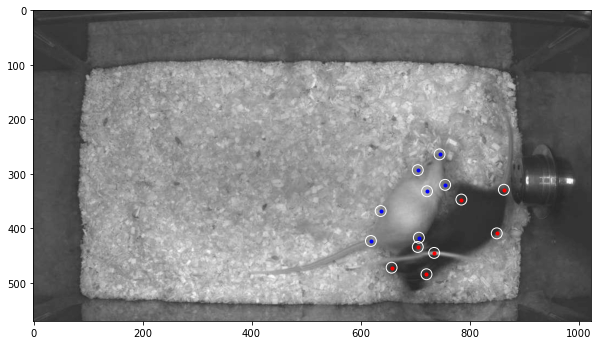

In [184]:
ind = 1

impth = 'D:\\MARS_eval_test\\extracted_images\\pose_top_testset_' + str(ind).zfill(4) + '.jpg'
im = Image.open(impth)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im, cmap='gray')

gt = MARS_output['gt_keypoints']['annotations'][ind*2]['keypoints']
for x,y in zip(gt[::3],gt[1::3]):
    plt.plot(x,y,'r.')
    circle = plt.Circle((x,y), 10, ec='white', fill=False)
    ax.add_patch(circle)

gt = MARS_output['gt_keypoints']['annotations'][ind*2+1]['keypoints']
for x,y in zip(gt[::3],gt[1::3]):
    plt.plot(x,y,'b.')
    circle = plt.Circle((x,y), 10, ec='white', fill=False)
    ax.add_patch(circle)

In [151]:
# a script to extract images from tfrecord files, for sanity-checking


import tensorflow.compat.v1 as tf
import cv2
import os

tfrecords_filename = 'D:\\MARS_data\\tfrecords\\tfrecords_pose_top\\test_dataset-00000-of-00001'
f = tfrecords_filename
output_path = 'D:\\MARS_eval_test\\extracted_images\\'
totalFiles=0

#get the number of records in the tfrecord file
c = 0
for record in tf.python_io.tf_record_iterator(tfrecords_filename):
    c += 1
totalFiles+=c

tf.reset_default_graph()

# here a path to tfrecords file as list
fq = tf.train.string_input_producer([tfrecords_filename], num_epochs=totalFiles)
reader = tf.TFRecordReader()
_, v = reader.read(fq)
fk = {
    'image/encoded': tf.FixedLenFeature((), tf.string, default_value=''),
    'image/class/synset': tf.FixedLenFeature([], tf.string, default_value=''),
    'image/filename': tf.FixedLenFeature([], tf.string, default_value='')
    }

ex = tf.parse_single_example(v, fk)
image = tf.image.decode_jpeg(ex['image/encoded'], dct_method='INTEGER_ACCURATE')
label = tf.cast(ex['image/class/synset'], tf.string)
fileName = tf.cast(ex['image/filename'], tf.string)
# The op for initializing the variables.
init_op = tf.group(tf.global_variables_initializer(),
                   tf.local_variables_initializer())

with tf.Session()  as sess:
    sess.run(init_op)

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    # sess.run([tf.global_variables_initializer(),tf.local_variables_initializer()])

    # set the number of images in your tfrecords file
    num_images=c
    print("going to restore {} files from {}".format(num_images, f))
    for i in range(num_images):

        im_,lbl,fName = sess.run([image,label,fileName])

        lbl_=lbl.decode("utf-8")

        savePath=os.path.join(output_path,lbl_)
        if not os.path.exists(savePath):
            os.makedirs(savePath)
        fName_=os.path.join(savePath, fName.decode("utf-8").split('_')[1])

        # chnage the image save path here
        cv2.imwrite('D:\\MARS_eval_test\\extracted_images\\pose_top_testset_' + str(i).zfill(4) + '.jpg' , im_)


    coord.request_stop()
    coord.join(threads)

going to restore 1500 files from D:\MARS_data\tfrecords\tfrecords_pose_top\test_dataset-00000-of-00001
